In [1]:
import numpy
from matplotlib import pyplot, cm
from numba import njit
from mpl_toolkits.mplot3d import Axes3D
import time 
from numba import njit
%matplotlib inline

In [3]:
@njit(fastmath=True)
def solve_2d_Poisson():
    nx = 150
    ny = 150
    nt  = 100
    xmin = 0
    xmax = 2
    ymin = 0
    ymax = 1
    
    dx = (xmax - xmin) / (nx - 1)
    dy = (ymax - ymin) / (ny - 1)
    
    # Initialization
    p  = numpy.zeros((ny, nx))
    pd = numpy.zeros((ny, nx))
    b  = numpy.zeros((ny, nx))
    x  = numpy.linspace(xmin, xmax, nx)
    y  = numpy.linspace(xmin, xmax, ny)
    row, col = p.shape
    
    # Source
    b[int(ny / 4), int(nx / 4)]  = 100
    b[int(3 * ny / 4), int(3 * nx / 4)] = -100
    
    
    for it in range(nt):
        pd = p.copy()
        for j in range(2, row):
            for i in range(2, col):
                p[j-1, i-1] = (((pd[j-1, i] + pd[j-1, i-2]) * dy**2 +
                                (pd[j, i-1] + pd[j-2, i-1]) * dx**2 -
                                b[j-1, i-1] * dx**2 * dy**2) / 
                                (2 * (dx**2 + dy**2)))
            
        p[0, :] = 0
        p[ny-1, :] = 0
        p[:, 0] = 0
        p[:, nx-1] = 0
        
    return x, y, p

In [4]:
#compute the cpu time of the solving 2d Poisson equation
start = time.time()
x, y, p = solve_2d_Poisson()
end = time.time()        
print("Execution time is : {msec} ms".format(msec=(end-start)*1000) )  

#compute the cpu time of the solving 2d Poisson equation
start = time.time()
x, y, p = solve_2d_Poisson()
end = time.time()        
print("Execution time is : {msec} ms".format(msec=(end-start)*1000) ) 

Execution time is : 1396.3170051574707 ms


Text(0.5, 0, '$y$')

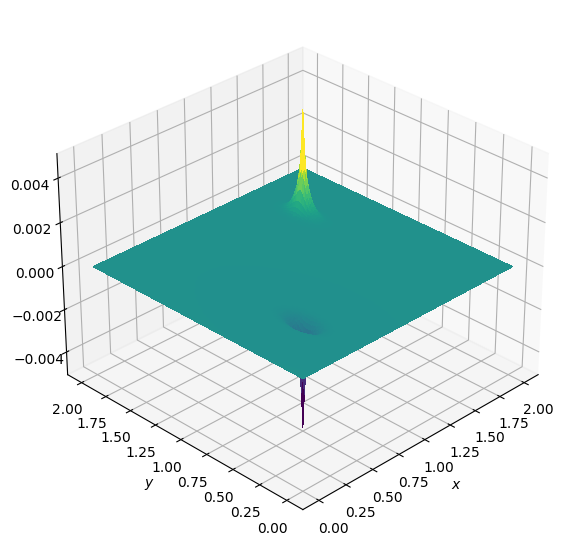

In [8]:
fig = pyplot.figure(figsize=(10, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, p, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)
ax.view_init(30, 225)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')